In [4]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=55a9c648213fca056f0df99d89043f4f597007fef5a8d45d18a29380e4570137
  Stored in directory: c:\users\madhu\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory(r'C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1721 images belonging to 3 classes.


In [7]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\madhu\Desktop\potato-disease-classification-main-main\train_test_val\train',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1721 images belonging to 3 classes.


In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(3, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))

In [11]:

cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
54/54 [==============================] - 13s 218ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648
Epoch 2/15
54/54 [==============================] - 12s 215ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648
Epoch 3/15
54/54 [==============================] - 13s 235ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648
Epoch 4/15
54/54 [==============================] - 12s 233ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648
Epoch 5/15
54/54 [==============================] - 12s 224ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648
Epoch 6/15
54/54 [==============================] - 10s 189ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648
Epoch 7/15
54/54 [==============================] - 10s 183ms/step - loss: 1.0234 - accuracy: 0.4648 - val_loss: 1.0234 - val_accuracy: 0.4648

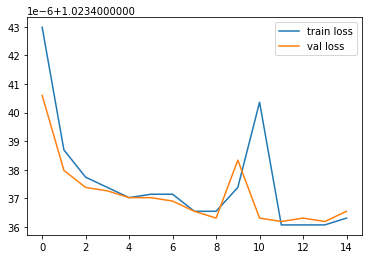

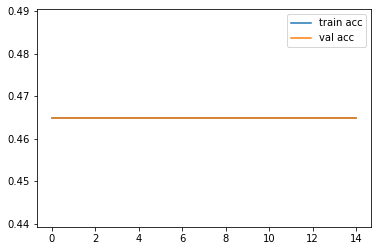

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')